In [5]:
import experiment_vis_leaderboard as lb

match_id = '210510_eun1_2825546524'
# match_id = '210510_euw1_5253755356' # too many WARD_PLACED
# match_id = '210510_kr_5179842525'

data = lb.load_leaderboard(match_id)
data.drop(labels='sum of ranks', axis='columns', inplace=True)
data

,KDA,Gold Earn & Spend,totalDamageDealtToChampions,damageDealtToBuildings,totalDamageTaken,totalHeal,totalMinionsKilled,totalTimeCCDealt,totalTimeSpentDead,total score
Rank 1,Player 9,Player 2,Player 3,Player 1,Player 7,Player 2,Player 1,Player 6,Player 1,Player 1
Rank 2,Player 4,Player 3,Player 6,Player 2,Player 2,Player 7,Player 9,Player 7,Player 8,Player 4
Rank 3,Player 2,Player 1,Player 1,Player 4,Player 1,Player 5,Player 3,Player 5,Player 6,Player 7
Rank 4,Player 3,Player 9,Player 9,Player 3,Player 8,Player 9,Player 4,Player 10,Player 3,Player 3
Rank 5,Player 7,Player 4,Player 5,Player 5,Player 6,Player 1,Player 8,Player 2,Player 7,Player 5
Rank 6,Player 10,Player 7,Player 7,Player 9,Player 9,Player 8,Player 6,Player 4,Player 5,Player 2
Rank 7,Player 6,Player 6,Player 2,Player 6,Player 4,Player 4,Player 5,Player 1,Player 10,Player 9
Rank 8,Player 1,Player 5,Player 4,Player 7,Player 10,Player 6,Player 10,Player 3,Player 2,Player 6
Rank 9,Player 5,Player 8,Player 10,Player 8,Player 3,Player 10,Player 7,Player 8,Player 9,Player 10
Rank 10,Player 8,Player 10,Player 8,Player 10,Player 5,Player 3,Player 2,Player 9,Player 4,Player 8


In [7]:
import pandas as pd

pd.set_option("display.max_rows", None, "display.max_columns", None)
events = ['ITEM_PURCHASED', 'ITEM_SOLD',
       'ITEM_DESTROYED', 'SKILL_LEVEL_UP', 'LEVEL_UP', 'WARD_PLACED',
       'WARD_KILL', 'CHAMPION_KILL', 'CHAMPION_KILL_ASSIST',
       'CHAMPION_KILL_VICTIM', 'BUILDING_KILL', 'BUILDING_KILL_ASSIST',
       'ELITE_MONSTER_KILL', 'ELITE_MONSTER_KILL_ASSIST']

# match_id = '210510_eun1_2825546524'
# match_id = '210510_euw1_5253755356' # too many WARD_PLACED
match_id = '210510_kr_5179842525'
data = pd.read_feather('./processed_ftr/scores_spaghettini.ftr')

data = data[(data['match_id'] == match_id) & (data['player'] == 0)].drop(labels=['match_id', 'win'], axis='columns')
data = data.drop(labels=['mage', 'fighter', 'support', 'tank', 'assassin', 'marksman', 'TOP', 'MIDDLE', 'BOTTOM', 'JUNGLE', 'UTILITY'], axis='columns')

scoresums, counts, means = [], [], []
for event in events:
    event_scores = data[data[event] == 1]['score'].tolist()
    
    _sum = sum(event_scores)
    _count = len(event_scores)
    _mean = _sum / _count if _count != 0 else 0
    
    scoresums.append(_sum)
    counts.append(_count)
    means.append(_mean)
    
scoresum_per_event = {
    'event': events, 'sum of score': scoresums, 'count': counts, 'mean': means
}
scoresum_per_event = pd.DataFrame(scoresum_per_event).sort_values(by='sum of score', axis=0, ascending=False, ignore_index=True)
scoresum_per_event

,event,sum of score,count,mean
0,LEVEL_UP,15.549849,16,0.971866
1,SKILL_LEVEL_UP,14.654456,17,0.862027
2,ITEM_PURCHASED,7.169795,21,0.341419
3,CHAMPION_KILL,7.073900,12,0.589492
4,CHAMPION_KILL_VICTIM,5.483677,8,0.685460
5,ITEM_DESTROYED,3.294292,10,0.329429
6,WARD_PLACED,2.146247,7,0.306607
7,CHAMPION_KILL_ASSIST,1.399211,4,0.349803
8,BUILDING_KILL,1.328683,1,1.328683
9,ELITE_MONSTER_KILL_ASSIST,0.328035,1,0.328035


In [4]:
import pandas as pd

pd.set_option("display.max_rows", None, "display.max_columns", None)

# match_id = '210510_eun1_2825546524'
# match_id = '210510_euw1_5253755356' # too many WARD_PLACED
match_id = '210510_kr_5179842525'
data = pd.read_feather('./processed_ftr/scores_spaghettini.ftr')

data = data[(data['match_id'] == match_id)].drop(labels=['match_id', 'win'], axis='columns')
data = data.drop(labels=['mage', 'fighter', 'support', 'tank', 'assassin', 'marksman', 'TOP', 'MIDDLE', 'BOTTOM', 'JUNGLE', 'UTILITY'], axis='columns')

scoresums, counts, means = [], [], []
data = data[data['CHAMPION_KILL_VICTIM'] == 1]
for player in range(10):
    event_scores = data[data['player'] == player]['score'].tolist()
    
    _sum = sum(event_scores)
    _count = len(event_scores)
    _mean = _sum / _count if _count != 0 else 0
    
    scoresums.append(_sum)
    counts.append(_count)
    means.append(_mean)
    
scoresum_per_event = {
    'player': [i+1 for i in range(10)], 'sum of score': scoresums, 'count': counts, 'mean': means
}
scoresum_per_event = pd.DataFrame(scoresum_per_event).sort_values(by='player', axis=0, ascending=True, ignore_index=True)
scoresum_per_event

,player,sum of score,count,mean
0,1,5.483677,8,0.685460
1,2,5.362437,9,0.595826
2,3,5.147723,9,0.571969
3,4,2.311023,3,0.770341
4,5,1.633372,2,0.816686
5,6,5.083198,8,0.635400
6,7,7.245811,9,0.805090
7,8,3.323119,6,0.553853
8,9,5.037922,9,0.559769
9,10,6.184399,9,0.687155


In [1]:
import pandas as pd

pd.set_option("display.max_rows", None, "display.max_columns", None)
events = ['ITEM_PURCHASED', 'ITEM_SOLD',
       'ITEM_DESTROYED', 'SKILL_LEVEL_UP', 'LEVEL_UP', 'WARD_PLACED',
       'WARD_KILL', 'CHAMPION_KILL', 'CHAMPION_KILL_ASSIST',
       'CHAMPION_KILL_VICTIM', 'BUILDING_KILL', 'BUILDING_KILL_ASSIST',
       'ELITE_MONSTER_KILL', 'ELITE_MONSTER_KILL_ASSIST']

# match_id = '210510_eun1_2825546524'
# match_id = '210510_euw1_5253755356' # too many WARD_PLACED
match_id = '210510_kr_5179842525'

data = pd.read_feather('./processed_ftr/scores_spaghettini.ftr')
data = data[(data['match_id'] == match_id) & (data['player'] == 1)]
data.sort_values(by='time', inplace=True, ignore_index=True)

event_seq = []
for i in range(data.shape[0]):
    seq = {
        'time': data.loc[i, 'time'],
        'score': data.loc[i, 'score']
    }
    for event in events:
        if data.loc[i, event] == 1: seq['event'] = event
    event_seq.append(seq)

event_seq = pd.DataFrame(event_seq)
event_seq

,time,score,event
0,0.000865,0.223095,ITEM_PURCHASED
1,0.001042,0.239459,ITEM_PURCHASED
2,0.001166,0.348709,ITEM_PURCHASED
3,0.021453,1.258340,SKILL_LEVEL_UP
4,0.055299,1.249994,LEVEL_UP
5,0.055370,1.247163,SKILL_LEVEL_UP
6,0.093470,1.240719,LEVEL_UP
7,0.093826,1.237663,SKILL_LEVEL_UP
8,0.140244,1.228984,LEVEL_UP
9,0.140600,1.053823,SKILL_LEVEL_UP


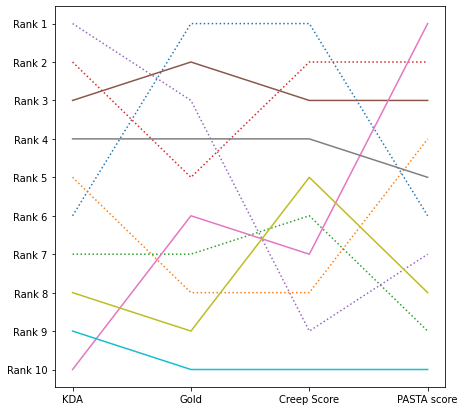

In [8]:
import experiment_vis_leaderboard as lb
import matplotlib.pyplot as plt

# match_id = '210510_eun1_2825546524'
# match_id = '210510_euw1_5253755356' # too many WARD_PLACED
match_id = '210510_kr_5179842525'

data, isWin = lb.load_leaderboard_graph(match_id)

players = []
for index, series in data.iterrows():
    ranks = series.tolist()
    ranks = [11-rank for rank in ranks]
    players.append(ranks)

x_axis = data.columns.tolist()

fig = plt.figure(figsize=(7, 7))

for i in range(len(players)):
    line = '-' if isWin[i] else ':'
    plt.plot(x_axis, players[i], linestyle=line, label=f'Player {i+1}')
plt.yticks([i+1 for i in range(10)], [f'Rank {10-i}' for i in range(10)])
    
plt.show()